2.0669 -0.2419


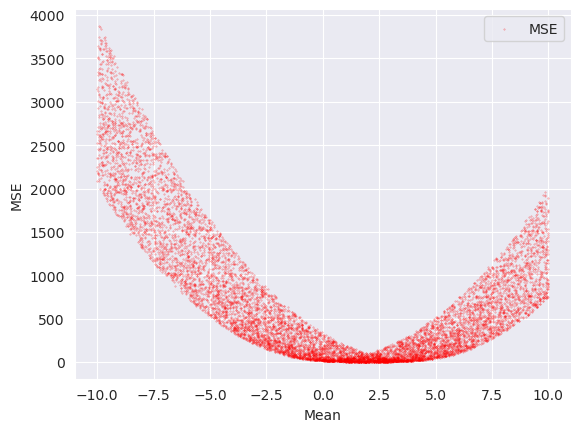

In [4]:
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt


test_data = pd.DataFrame(
    {'x': [1, 2, 3, 4, 5, 6, 7],
     'y': [2, 4, 6, 8, 10, 12, 14]})

def algorithm(x, y, iteration, resolution):
    mse_list, m_list, b_list = [], [], []

    for i in range(iteration):
        val1 = (randint(-10000, 10000)) / 1000
        val2 = (randint(-10000, 10000)) / 1000
        if val1 > 0:
            val1 = val1 - resolution
            if val2 >= 0:
                val2 = val2 - resolution
            else:
                val2 = val2 + resolution
        elif val1 < 0:
            val1 = val1 + resolution
            if val2 >= 0:
                val2 = val2 - resolution
            else:
                val2 = val2 + resolution
        else:
            pass

        mse, m = deploy_values(val1, val2, x, y)
        mse_list.append(mse)
        m_list.append(m)
        b_list.append(val2)

    results = pd.DataFrame({'mse': mse_list, 'm': m_list, 'b': b_list})

    global_minimum = results['mse'].min()
    optimal_values = results.loc[results['mse'] == global_minimum]
    slope = optimal_values['m'].iloc[0]
    intercept = optimal_values['b'].iloc[0]

    return global_minimum, slope, intercept, mse_list, b_list , m_list

def deploy_values(m, b, x, y):
    y_pred = (m * x) + b
    mse = ((y - y_pred) ** 2).mean()
    return mse, m

def predict(slope, intercept,x):
    return slope*x + intercept

def create_model(x,y,iteration, resolution):
    for i in range(iteration):
        return algorithm(x, y, iteration, resolution)

x = test_data['x']
y = test_data['y']
model_1 = create_model(x,y,10000,0.0001)
print(model_1[1],model_1[2])
MSE = model_1[3]
MEAN = model_1[5]

plt.scatter(MEAN,MSE , color='red', label='MSE' , s=0.1 , alpha=0.5)
plt.xlabel('Mean')
plt.ylabel('MSE')
plt.legend()
plt.show()




